# Word clouds

Visualization of word clouds by cluster to confirm key words and removal of stop words.

## Data setup

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from wordcloud import WordCloud

In [131]:
X_cluster = pd.read_csv("/Users/egmac/code/arostagnat/BookMatch/data/proc_data/cluster_result/X_bert_cluster_99.csv")

In [132]:
X_proc_new = pd.read_csv("/Users/egmac/code/arostagnat/BookMatch/data/proc_data/cluster_result/X_proc_10200_jsonlines.csv")
X_proc_new.item_id_movie = X_proc_new.item_id_movie.replace({-1: -2}, regex=False)
X_proc_new.item_id_book = X_proc_new.item_id_book.replace({-1: -3}, regex=False)
# X_proc_old = pd.read_csv("/Users/egmac/code/arostagnat/BookMatch/data/proc_data_original/X_proc_full_jsonlines.csv")

In [ ]:
# X_proc_old = X_proc_old.replace({'$$$': 0}, regex=False)
# X_proc_old.item_id_movie = X_proc_old.item_id_movie.astype(float)
# X_proc_old.item_id_book = X_proc_old.item_id_book.astype(float)

In [ ]:
# X_cluster_99 = pd.merge(X_cluster_99,X_proc_old[["item_id_movie","txt"]],how="left",on="item_id_movie")
# X_cluster_99 = pd.merge(X_cluster_99,X_proc_old[["item_id_book","txt"]],how="left",on="item_id_book")

# X_cluster_99["txt_old"] = X_cluster_99['txt_x'].combine_first(X_cluster_99['txt_y'])
# X_cluster_99 = X_cluster_99.drop(columns=["txt_x","txt_y"])

In [135]:
X_cluster_revised = pd.merge(X_cluster,X_proc_new[["item_id_movie","txt"]],how="left",on="item_id_movie")
X_cluster_revised = pd.merge(X_cluster_revised,X_proc_new[["item_id_book","txt"]],how="left",on="item_id_book")

In [136]:
X_cluster_revised.head(3)

,item_id_movie,is_movie,item_id_book,clustering_label_bert,vector,txt_x,txt_y
0,1.0,1.0,-1.0,17,"[-0.010749077424407005, -0.052126478403806686,...","Toy Story 9/10, Toy Story 3-D 5/10- rip off; L...",NaN
1,2.0,1.0,-1.0,80,"[-0.054170604795217514, 0.06728383898735046, 0...",A breathless unforgettable adventure!; I remem...,NaN
2,3.0,1.0,-1.0,60,"[0.0022878432646393776, -0.01589525304734707, ...",great; This is an all time great for all the f...,NaN


In [137]:
X_cluster_revised["txt_new"] = X_cluster_revised['txt_x'].combine_first(X_cluster_revised['txt_y'])
X_cluster_revised = X_cluster_revised.drop(columns=["txt_x","txt_y"])

In [138]:
print(f"X_cluster: {X_cluster.shape}, X_cluster_revised: {X_cluster_revised.shape}")

X_cluster: (4266, 5), X_cluster_revised: (4266, 6)


## Creation of word clouds

In [141]:
clusters = list(set(X_cluster_revised.clustering_label_bert))
print(f"Available clusters: {clusters}")

Available clusters: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]


In [142]:
def get_wordcloud (cluster):
    
    cluster_txt = X_cluster_revised[X_cluster_revised.clustering_label_bert == cluster]
    new_txt_agg = cluster_txt.groupby('clustering_label_bert')['txt_new'].apply(' '.join).item()
    wordcloud = WordCloud().generate(new_txt_agg)
    
    return wordcloud

### Example wordclouds

In [199]:
## Create wordclouds for 20 random clusters in sample. 

random_clusters = np.random.choice(clusters, 10)

wordcloud_dict = {}

for cluster in random_clusters:
    wordcloud_dict[cluster] = get_wordcloud(cluster)

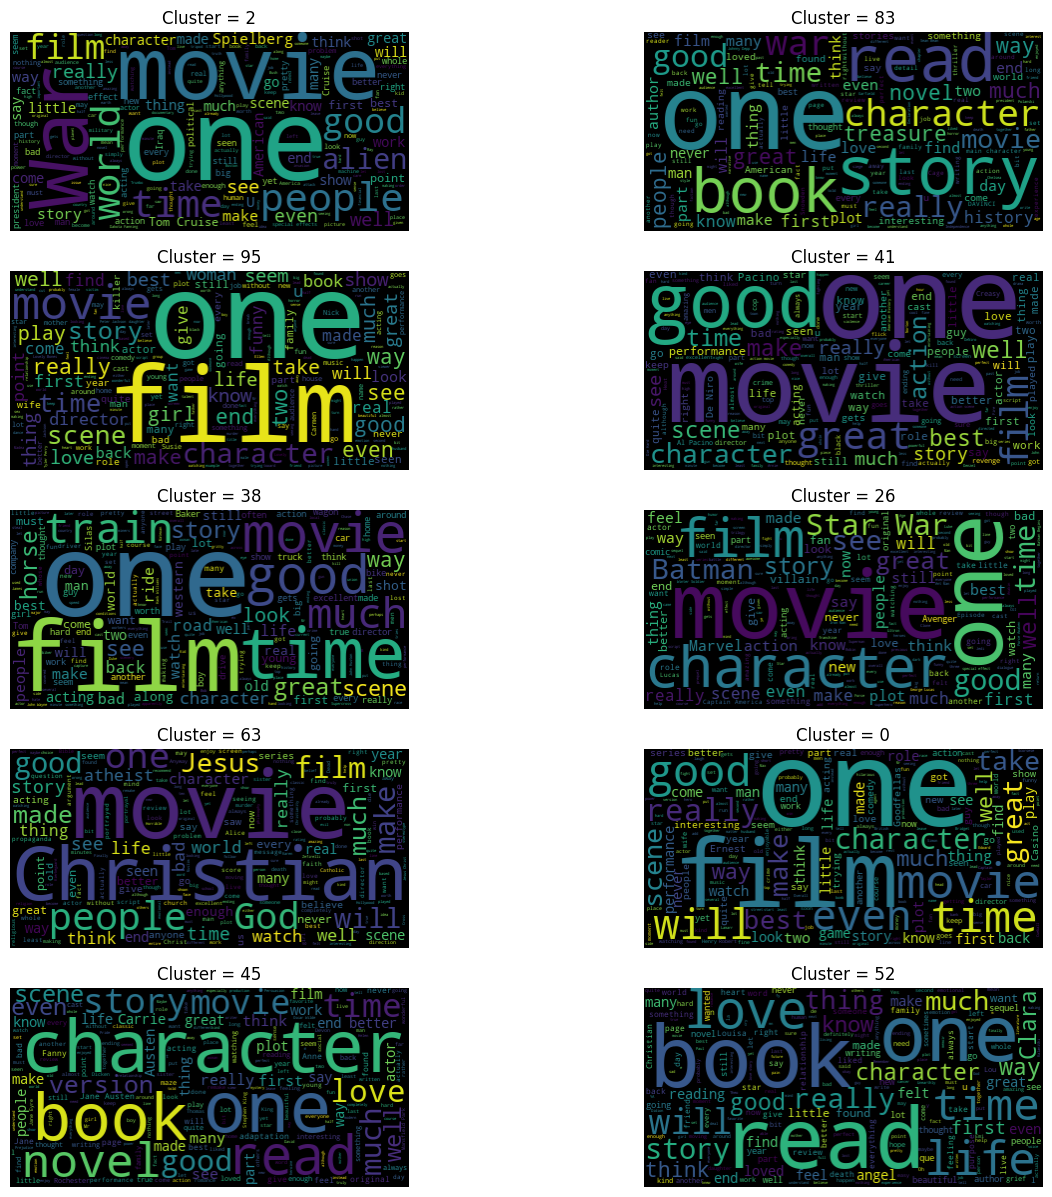

In [200]:
## Visualize wordclouds

rows = int(len(random_clusters)/2)
fig, axes = plt.subplots(rows,2,figsize=(15, 15))

for key, ax in zip(wordcloud_dict.keys(), axes.flatten()):
    ax.title.set_text(f"Cluster = {key}")
    ax.imshow(wordcloud_dict.get(key), interpolation='bilinear');
    ax.axis("off");

plt.pause(0.001)
plt.show()

### Final recommendation

Add the following words to stop words:
- one
- character
- story
- movie
- film
- book 
- novel
- good
- much
- really
- will
- see
- read